<hr>

# AI Workflow Capstone - AAVAIL - **Part 1 - EDA**

Student: `Alexey Tyurin`<br>
Date: `1/16/2024`
<hr>

### Project Introduction
- We've been tasked with building a revenue prediction model for AAVAIL, a company looking to switch from a subscription-based service to a new approach. We've collected transaction data from 38 countries but will focus on the top ten revenue-generating ones. The goal is to provide accurate revenue predictions, saving management time and improving budget projections. Success will be measured by how much our model improves accuracy compared to the current spreadsheet-based system.

### Project Objectives:
- Develop a tool to predict monthly revenue anytime.
- Enable revenue projection for specific countries.
- Focus on the top ten revenue-generating countries.
- Enhance revenue prediction accuracy to aid staffing and budget stability for managers.

### 1. Assimilate the business scenario and articulate testable hypothesis

Build a tool which at any point in time will predict the revenue for the following month
Have the ability to project revenue for a specific country
Limit the model to the ten countries with the most revenue
Managers will be the end users of this model. Currently, they are using their own methods to predict revenues which is time consuming and the predictions are less accurate due to lack of data science expertise. Good projected numbers from the model will help stabilize staffing and budget projections.

**Business metrics:**
- Time saved due to automatization
- Revenue gained due to more accurate predictions compared to the current spread-sheets

**Testable Hypothesis:**
- Because the advanced of AI could handle more data and solve complex solutions, the new model could be more accurate than the current spreadsheets. In addition, the full automatization will reduce human intervention, making the process robust and less prone to errors.

### 2. State the ideal data to address the business opportunity and clarify the rationale for needing specific data

**Target Value:**
The target value are the revenue numbers per country. These numbers could break down to daily revenues. Historical revenues data is needed to train and evaluate the model. Revenue is given as the product of price and volume.

**Feature matrix:**
Historical data for invoices could be used to predict the revenues. For example data such as, country, customer, service/product, price and volume could be used to calculate the revenues and identify the most significant factors that have an impact in the revenues prediction.

### 3. Create a python script to extract relevant data from multiple data sources, automating the process of data ingestion.

#### Automated Data Ingestion Process

In [1]:
# Libraries

import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from utils_data import *

In [2]:
# CONSTANTS

ROOT_DIR = '.'
DATA_TRAIN_DIR = os.path.join(ROOT_DIR, 'cs-train')
IMAGE_DIR = os.path.join(ROOT_DIR, 'images')


#### Fetch Train Data

In [3]:
ts = fetch_ts(DATA_TRAIN_DIR, top_n=10, clean=False)

... loading time series data from files


In [4]:
ts['all'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   invoice_date     611 non-null    datetime64[ns]
 1   purchases        611 non-null    int64         
 2   unique_invoices  611 non-null    int64         
 3   unique_streams   611 non-null    int64         
 4   total_views      611 non-null    int64         
 5   revenue          611 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 28.8 KB


#### Convert TimeSeries into DataFrame

In [5]:
df = pd.concat(ts, keys=ts.keys(), names=["country"]).reset_index(level=0)

#### Data Inspection and Summary

In [6]:
df.head()

,country,invoice_date,purchases,unique_invoices,unique_streams,total_views,revenue
0,all,2017-11-28,3223,166,1345,15047,14450.54
1,all,2017-11-29,3277,133,1397,14159,13411.96
2,all,2017-11-30,3002,150,1335,15766,13290.25
3,all,2017-12-01,2559,107,1256,12524,9687.28
4,all,2017-12-02,402,32,287,3313,1443.26


In [7]:
df.tail()

,country,invoice_date,purchases,unique_invoices,unique_streams,total_views,revenue
606,united_kingdom,2019-07-27,0,0,0,0,0.00
607,united_kingdom,2019-07-28,1093,38,721,5220,2656.70
608,united_kingdom,2019-07-29,1124,49,735,6324,4124.82
609,united_kingdom,2019-07-30,1007,52,699,5495,15260.12
610,united_kingdom,2019-07-31,1522,79,858,9187,4844.04


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6331 entries, 0 to 610
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   country          6331 non-null   object        
 1   invoice_date     6331 non-null   datetime64[ns]
 2   purchases        6331 non-null   int64         
 3   unique_invoices  6331 non-null   int64         
 4   unique_streams   6331 non-null   int64         
 5   total_views      6331 non-null   int64         
 6   revenue          6331 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 395.7+ KB


In [9]:
df.isnull().sum()

country            0
invoice_date       0
purchases          0
unique_invoices    0
unique_streams     0
total_views        0
revenue            0
dtype: int64

In [10]:
df.describe(include='all')

,country,invoice_date,purchases,unique_invoices,unique_streams,total_views,revenue
count,6331,6331,6331.000000,6331.000000,6331.000000,6331.000000,6331.000000
unique,11,NaN,NaN,NaN,NaN,NaN,NaN
top,all,NaN,NaN,NaN,NaN,NaN,NaN
freq,611,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2018-10-05 18:05:37.766545664,254.758806,13.323014,137.378613,1324.188122,1222.655622
min,NaN,2017-11-28 00:00:00,0.000000,0.000000,0.000000,0.000000,-45645.329000
25%,NaN,2018-05-17 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,2018-10-08 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,2019-03-01 00:00:00,29.000000,2.000000,28.000000,240.000000,106.300000
max,NaN,2019-07-31 00:00:00,7756.000000,219.000000,1596.000000,29374.000000,170304.180000


In [11]:
df[['country', 'revenue']].groupby('country') \
                        .agg({'country': 'count', 'revenue': 'sum'}) \
                        .rename(columns={'country': 'count', 'revenue': 'sum'}) \
                        .sort_values(by='sum', ascending=False) \
                        .style.format('{:,.0f}')

,count,sum
country,,
all,611,"3,914,197"
united_kingdom,611,"3,521,514"
eire,608,"107,069"
germany,611,"49,272"
france,611,"40,565"
norway,593,"38,495"
spain,603,"16,041"
hong_kong,428,"14,453"
portugal,611,"13,529"


#### Quiz Questions

In [12]:
temp = load_json_files_to_dataframe(DATA_TRAIN_DIR)

##### Question 2.
> When you compiled the JSON files into a single DataFrame or NumPy array, about how many days did the entire range of dates span?

In [13]:
# Retrieve the count of distinct days
print(f"There were {temp['invoice_date'].nunique()} unique invoice dates and they ranged a span of {(temp['invoice_date'].max() - temp['invoice_date'].min()).days} days.")

There were 495 unique invoice dates and they ranged a span of 610 days.


##### Question 3
> Which country had the most total revenue when you summed across all purchases?

In [14]:
# Determine the country with the highest number of transactions.
top = temp[['country', 'revenue']].groupby('country')['revenue'].sum().sort_values(ascending=False)
print(f'The {top.index[0]} had by far the most total revenue over the time period with {top.iloc[0]:,.2f}.')

The United Kingdom had by far the most total revenue over the time period with 3,521,513.50.


### 4. Investigate the relationship between the relevant data, the target and the business metric.

#### Data Visualization

In [15]:
df.groupby('country').count()['invoice_date'].sort_values(ascending=False)

country
all               611
france            611
germany           611
portugal          611
united_kingdom    611
eire              608
spain             603
netherlands       596
norway            593
singapore         448
hong_kong         428
Name: invoice_date, dtype: int64

In [16]:
# Charts presets

if not os.path.exists(IMAGE_DIR):
    os.makedirs(IMAGE_DIR)

palette = sns.color_palette("deep")

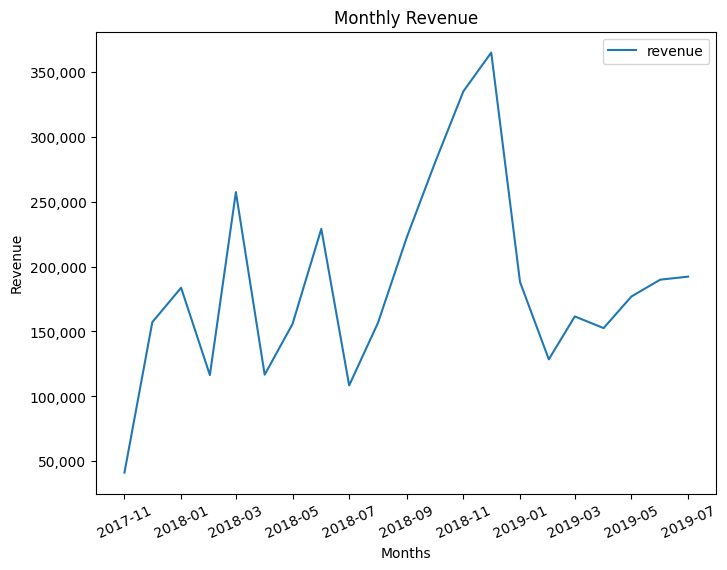

In [17]:
# Monthly Revenue

fig, ax = plt.subplots(figsize=(8, 6))

data = df[df['country']=='all'].set_index("invoice_date")[["revenue"]].resample("MS").sum()

sns.lineplot(data=data, ax=ax)
ax.set_title('Monthly Revenue')
ax.set_xlabel('Months')
ax.set_ylabel('Revenue')
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xticks(rotation=25)

plt.savefig(os.path.join(IMAGE_DIR, "monthly_revenue.png"), format='png', dpi=300)
plt.show()


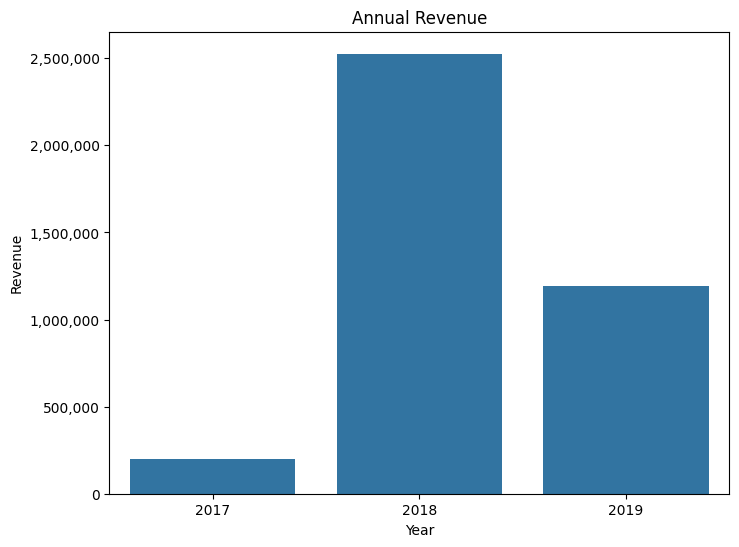

In [18]:
# Annual Revenue

fig, ax = plt.subplots(figsize=(8, 6))

data = df[df['country']=='all'][['invoice_date', 'revenue']].copy()
data['invoice_date'] = data['invoice_date'].dt.year
data = data.groupby('invoice_date')['revenue'].sum().reset_index()

sns.barplot(x='invoice_date', y='revenue', data=data, ax=ax)

ax.set_title('Annual Revenue')
ax.set_xlabel('Year')
ax.set_ylabel('Revenue')
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.savefig(os.path.join(IMAGE_DIR, "annual_revenue.png"), format='png', dpi=300)
plt.show()


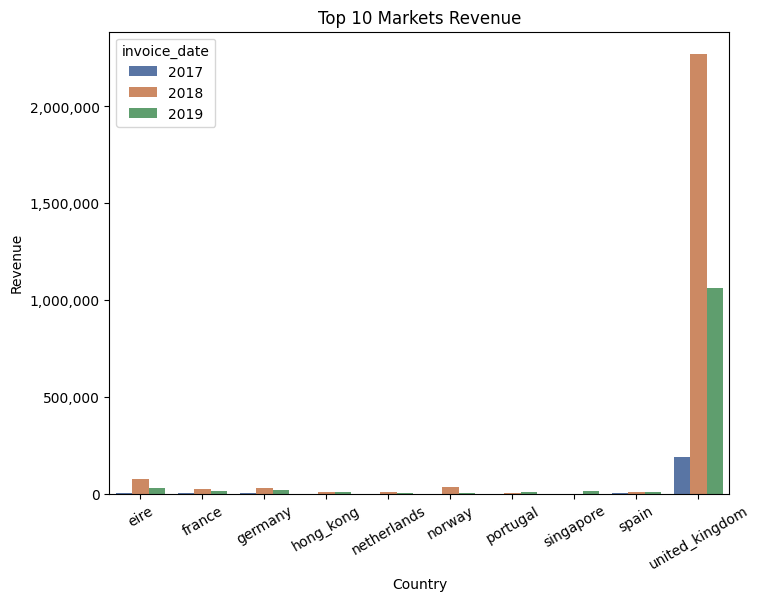

In [19]:
## Top 10 Markets Revenue

fig, ax = plt.subplots(figsize=(8,6))

top = df[df['country']!='all'][['country', 'revenue']] \
        .groupby('country')['revenue'].sum() \
        .sort_values(ascending=False).nlargest(TOP_COUNTRIES).index.tolist()
data = df[df['country'].isin(top)][['invoice_date', 'country', 'revenue']].copy()
data['invoice_date'] = data['invoice_date'].dt.year

data = data.groupby(['country','invoice_date'])['revenue'].sum().reset_index()

sns.barplot(x='country', y='revenue', hue='invoice_date', data=data, ax=ax, palette=palette[:3])

ax.set_title('Top 10 Markets Revenue')
ax.set_xlabel('Country')
ax.set_ylabel('Revenue')
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xticks(rotation=30)
plt.savefig(os.path.join(IMAGE_DIR, "top_markets.png"), format='png', dpi=300)
plt.show()

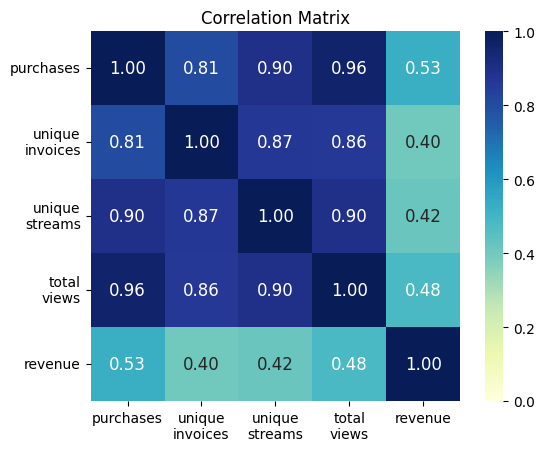

In [20]:
## Correlation Matrix

cm = df[df['country']=='all'].drop(['country', 'invoice_date'], axis=1)
cols = cm.columns
cm = cm.corr()
ax = sns.heatmap(cm,
                 cbar=True, 
                 annot=True, 
                 square=True,
                 fmt='.2f',
                 vmin=0,
                 vmax=1,
                 cmap='YlGnBu',
                 annot_kws={'size': 12},
                 yticklabels=cols,
                 xticklabels=cols)

ax.set_title('Correlation Matrix')
ax.set_yticklabels([label.replace('_', '\n') for label in cm.columns])
ax.set_xticklabels([label.replace('_', '\n') for label in cm.columns])
plt.xticks(rotation=0)
plt.savefig(os.path.join(IMAGE_DIR, "correlation.png"), format='png', dpi=300)
plt.show()

### 5. Articulate your findings using a deliverable with visualizations.

**Enhanced Data Visualization**
<br>
Data visualization transforms complex data into visual formats, uncovering hidden patterns, trends, and correlations. While tables offer detailed information, they can be cumbersome. Simple plots can effectively summarize this data. Often, combining tables and plots in a deliverable's appendix provides a comprehensive view. In Exploratory Data Analysis (EDA), presenting findings in a polished, clear manner is crucial. This approach aims to identify factors influencing revenues.

#### Total Revenues Over Time
- The total revenues were plotted over time to gain a deeper understanding of their progression in recent years. This analysis was essential for identifying how revenues evolved and for pinpointing the key factors influencing them. The objective was to meticulously analyze the revenue trends to isolate and understand the main drivers behind these financial changes.

#### Observations on Revenue Patterns
- The total revenues do not exhibit a seasonal trend.
- The peak year for revenues was 2018, reaching 2.5 million.
- The end of 2018 marked the period of highest revenue for the company.
- A significant decline in revenues was observed in 2019. It's important to note that the 2019 data is incomplete.
- Additionally, it's important to consider that the data for 2017 only covers two months, while the 2019 data encompasses seven months.

#### Analysis of Revenues by Country
- It's essential to examine the development of revenues across the top-performing countries. This analysis will provide insights into geographic contributions to overall revenue growth and identify key markets.

#### Analysis of UK Revenues in Relation to Total Performance
- The UK stands out as the primary revenue-generating market, commanding nearly 90% of the total market share. In contrast, EIRE holds a modest 3%, and other markets demonstrate significantly lower revenues. Given the UK's dominance, it's critical to delve deeper into this market's performance compared to the overall revenues, highlighting the UK's impact and significance in the broader financial landscape.

#### Summary of Findings and Next Steps in Revenue-Influencing Factors Analysis

**Findings:**
- The analysis focused on identifying revenue-influencing factors.
- Data completeness was limited to 2018, the year with the highest revenues.
- Revenue patterns displayed no seasonality.
- The UK emerged as the predominant market.
- A positive correlation exists between revenues and purchases.


**Next Steps:**
- **In-Depth Feature Analysis**: Investigate whether numerical features should be transformed for a normal (bell-shaped) distribution.
- **Hypothesis Testing**: Formulate and test hypotheses regarding the significance of each feature.
- **Advanced Data Aggregation**: Implement various aggregation methods for each feature to enhance data exploration and understanding.

[EOF]